In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
og = pd.read_csv("AB_NYC_2019.csv")
np.random.seed(0)

In [5]:
og.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
og.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
data = og.copy()

In [8]:
print(data.isna().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [9]:
data.shape

(48895, 16)

In [10]:
nan_name = data[data['name'].isnull()]
print(nan_name)

             id name   host_id host_name neighbourhood_group  \
2854    1615764  NaN   6676776     Peter           Manhattan   
3703    2232600  NaN  11395220      Anna           Manhattan   
5775    4209595  NaN  20700823     Jesse           Manhattan   
5975    4370230  NaN  22686810   Michaël           Manhattan   
6269    4581788  NaN  21600904     Lucie            Brooklyn   
6567    4756856  NaN   1832442  Carolina            Brooklyn   
6605    4774658  NaN  24625694      Josh           Manhattan   
8841    6782407  NaN  31147528  Huei-Yin            Brooklyn   
11963   9325951  NaN  33377685  Jonathan           Manhattan   
12824   9787590  NaN  50448556    Miguel           Manhattan   
13059   9885866  NaN  37306329  Juliette           Manhattan   
13401  10052289  NaN  49522403   Vanessa            Brooklyn   
15819  12797684  NaN  69715276       Yan           Manhattan   
16071  12988898  NaN  71552588    Andrea               Bronx   
18047  14135050  NaN  85288337      Jeff

In [11]:
nan_host_name = data[data['host_name'].isnull()]
print(nan_host_name)

             id                                               name    host_id  \
360      100184                                          Bienvenue     526653   
2700    1449546                            Cozy Studio in Flatbush    7779204   
5745    4183989    SPRING in the City!! Zen-Style Tranquil Bedroom     919218   
6075    4446862                 Charming Room in Prospect Heights!   23077718   
6582    4763327                Luxurious, best location, spa inc'l   24576978   
8163    6292866                          Modern Quiet Gem Near All   32722063   
8257    6360224                    Sunny, Private room in Bushwick   33134899   
8852    6786181                       R&S Modern Spacious Hideaway   32722063   
9138    6992973                    1 Bedroom in Prime Williamsburg    5162530   
9817    7556587                               Sunny Room in Harlem   39608626   
14040  10709846                 Sunny, spacious room in Greenpoint    7822683   
14631  11553543             

In [12]:
common_nan = data[data['name'].isna() & data['host_name'].isna()]
print(common_nan)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


*There is no value that has both NAME and HOST_NAME as NAN*

In [14]:
print(nan_name['id'])

2854      1615764
3703      2232600
5775      4209595
5975      4370230
6269      4581788
6567      4756856
6605      4774658
8841      6782407
11963     9325951
12824     9787590
13059     9885866
13401    10052289
15819    12797684
16071    12988898
18047    14135050
28889    22275821
Name: id, dtype: int64


*These customer don't have there name*

In [16]:
print(nan_host_name['id'])

360        100184
2700      1449546
5745      4183989
6075      4446862
6582      4763327
8163      6292866
8257      6360224
8852      6786181
9138      6992973
9817      7556587
14040    10709846
14631    11553543
15174    12113879
19565    15648096
27777    21787094
27962    21867710
28042    21901156
28274    21990808
30570    23660605
32193    25180572
38992    30468335
Name: id, dtype: int64


*These customer don't have there host_name*

In [41]:
import string
import pandas as pd
alphabets = list(string.ascii_uppercase)  
flattened_data = data.values.flatten() 
nan_indices = pd.isna(flattened_data)  
alphabets_repeated = (alphabets * (sum(nan_indices) // len(alphabets) + 1))[:sum(nan_indices)]

flattened_data[nan_indices] = alphabets_repeated
data_imputed = pd.DataFrame(flattened_data.reshape(data.shape), columns=data.columns)
print(data_imputed)

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

*REMOVED ALL THE NAN VALUES WITH ALPHABETS*

In [20]:
duplicateRows = data[data.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


In [22]:
duplicateRows = data[data.duplicated(subset=['id', 'name'])]
print(duplicateRows)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


*There are no duplicate data*

*Outliers Detection*

In [24]:
from scipy import stats
z_scores = np.abs(stats.zscore(data['price']))
threshold = 3
outliers_in = z_scores > threshold
outliers = data[outliers_in]
print("Outliers (Z-score method):", outliers)

Outliers (Z-score method):              id                                               name    host_id  \
496      174966              Luxury 2Bed/2.5Bath Central Park View     836168   
762      273190          6 Bedroom Landmark West Village Townhouse     605463   
946      363673                   Beautiful 3 bedroom in Manhattan     256239   
1105     468613   $ (Phone number hidden by Airbnb) weeks - room f    2325861   
1414     634353                Luxury 1Bed with Central Park Views     836168   
...         ...                                                ...        ...   
48301  36186719           Private Bedroom in the Heart of Chelsea!  268920555   
48304  36189195      Next to Times Square/Javits/MSG! Amazing 1BR!  270214015   
48305  36189257             2BR Near Museum Mile! Upper East Side!  272166348   
48523  36308562  Tasteful & Trendy Brooklyn Brownstone, near Train  217732163   
48535  36311055     Stunning & Stylish Brooklyn Luxury, near Train  245712163   



*We can see that these are listings with relatively high prices compared to the rest of the data*

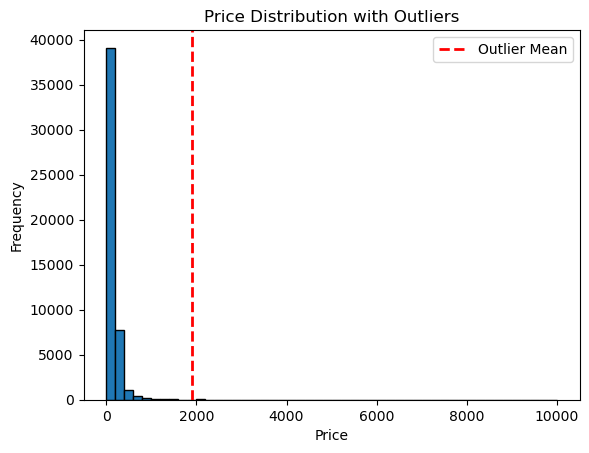

In [26]:
plt.hist(data['price'], bins=50, edgecolor='black')
plt.axvline(x=outliers['price'].mean(), color='r', linestyle='dashed', linewidth=2, label="Outlier Mean")
plt.title("Price Distribution with Outliers")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [32]:
nh = data['neighbourhood'].unique()
nh.sort()
print(nh)

['Allerton' 'Arden Heights' 'Arrochar' 'Arverne' 'Astoria' 'Bath Beach'
 'Battery Park City' 'Bay Ridge' 'Bay Terrace'
 'Bay Terrace, Staten Island' 'Baychester' 'Bayside' 'Bayswater'
 'Bedford-Stuyvesant' 'Belle Harbor' 'Bellerose' 'Belmont' 'Bensonhurst'
 'Bergen Beach' 'Boerum Hill' 'Borough Park' 'Breezy Point' 'Briarwood'
 'Brighton Beach' 'Bronxdale' 'Brooklyn Heights' 'Brownsville'
 "Bull's Head" 'Bushwick' 'Cambria Heights' 'Canarsie' 'Carroll Gardens'
 'Castle Hill' 'Castleton Corners' 'Chelsea' 'Chinatown' 'City Island'
 'Civic Center' 'Claremont Village' 'Clason Point' 'Clifton'
 'Clinton Hill' 'Co-op City' 'Cobble Hill' 'College Point' 'Columbia St'
 'Concord' 'Concourse' 'Concourse Village' 'Coney Island' 'Corona'
 'Crown Heights' 'Cypress Hills' 'DUMBO' 'Ditmars Steinway' 'Dongan Hills'
 'Douglaston' 'Downtown Brooklyn' 'Dyker Heights' 'East Elmhurst'
 'East Flatbush' 'East Harlem' 'East Morrisania' 'East New York'
 'East Village' 'Eastchester' 'Edenwald' 'Edgemere' 'Elmh

In [34]:
nhg = data['neighbourhood_group'].unique()
nhg.sort()
print(nhg)

['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']


*There is no inconsistency in the dataset*